#Building enviroment

##Setting GPU as hardware accelerator

In [2]:
!nvidia-smi

Sat Feb  8 23:28:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

##Installing dependecies

In [3]:
!pip install tokenizers==0.21

!pip install -q gdown inference-gpu supervision
!pip install -q git+https://github.com/roboflow/sports.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 9.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 970.7/970.7 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!mkdir content
!mkdir results

In [5]:
!gdown -O "content/0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
!gdown -O "content/2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
!gdown -O "content/08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
!gdown -O "content/573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "content/121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: /content/content/0bfacc_0.mp4
100% 19.9M/19.9M [00:00<00:00, 149MB/s] 
Downloading...
From: https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf
To: /content/content/2e57b9_0.mp4
100% 21.1M/21.1M [00:00<00:00, 98.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-
To: /content/content/08fd33_0.mp4
100% 19.9M/19.9M [00:00<00:00, 26.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU
To: /content/content/573e61_0.mp4
100% 18.9M/18.9M [00:00<00:00, 175MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 101MB/s] 


In [6]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

#K means algorithm


In [7]:
from tqdm import tqdm
import supervision as sv
SOURCE_VIDEO_PATH = "content/0bfacc_0.mp4"
TARGET_VIDEO_PATH = "results/0bfacc_0_result.mp4"

In [8]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW')
PLAYER_DETECTION_MODEL = get_model(model_id="football-players-detection-6domv/1", api_key=ROBOFLOW_API_KEY)

##Taking croped images of players

In [9]:
STRIDE = 30 #skip every 29 frames
PLAYER_ID = 2

def extract_crops(video_path:str):

  frame_generator = sv.get_video_frames_generator(video_path, stride=STRIDE)

  crops = []
  for frame in tqdm(frame_generator,desc="collecting crops"):
    result = PLAYER_DETECTION_MODEL.infer(frame,confidence=0.3)[0]
    detections = sv.Detections.from_inference(result)
    detections = detections.with_nms(threshold=0.5, class_agnostic=True)
    detections = detections[detections.class_id == PLAYER_ID]
    crops += [
        sv.crop_image(frame, xyxy)
        for xyxy in detections.xyxy
    ]

  return crops

In [10]:
crops = extract_crops(SOURCE_VIDEO_PATH)

collecting crops: 25it [00:13,  1.91it/s]


In [11]:
len(crops)

490

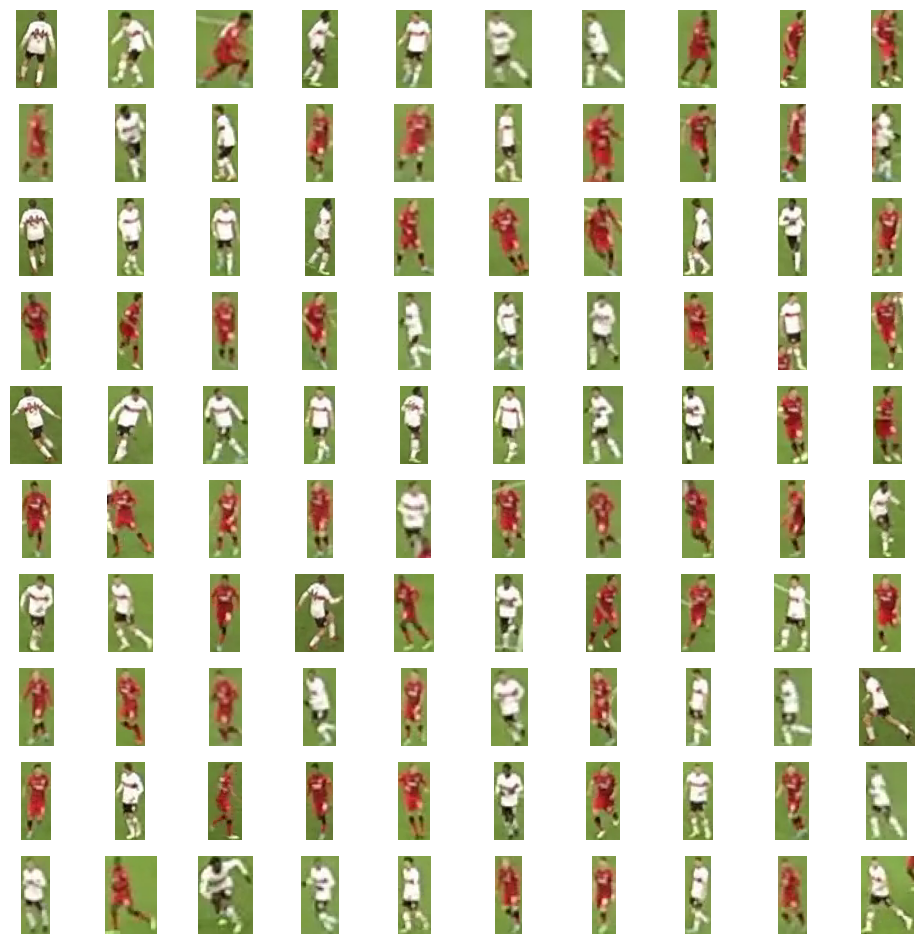

In [12]:
sv.plot_images_grid(crops[:100],grid_size=[10,10])

A simple algorithm to differentiate teams may be problematic due to various irrelevant color variations, such as players' skin tones, pitch color, and lighting conditions. A more effective approach is to use a machine learning clustering method. For this, we employ k-means.

In [13]:
import torch
from transformers import AutoProcessor, SiglipVisionModel

SIGLIP_MODEL_PATH = "google/siglip-base-patch16-224"

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
EMBEDDINGS_MODEL = SiglipVisionModel.from_pretrained(SIGLIP_MODEL_PATH).to(DEVICE)
EMBEDDINGS_PROCESSOR = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/813M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/711 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.40M [00:00<?, ?B/s]

In [14]:
from more_itertools import chunked
import numpy as np

BATCH_SIZE = 32

crops = extract_crops(SOURCE_VIDEO_PATH)

crops = [sv.cv2_to_pillow(crop) for crop in crops]
batches = chunked(crops,BATCH_SIZE)

data = []

with torch.no_grad():
  for batch in tqdm(batches,desc="Embedding extraction"):
    inputs = EMBEDDINGS_PROCESSOR(images=batch, return_tensors="pt").to(DEVICE)
    outputs = EMBEDDINGS_MODEL(**inputs)
    embeddings = torch.mean(outputs.last_hidden_state,dim=1).cpu().numpy()
    data.append(embeddings)

data = np.concatenate(data)

collecting crops: 25it [00:13,  1.89it/s]
Embedding extraction: 16it [00:06,  2.66it/s]


In [15]:
data.shape

(490, 768)

In [16]:
import umap
from sklearn.cluster import KMeans

REDUCER = umap.UMAP(n_components=3) #reduce to tridimensional space
CLUSTERING = KMeans(n_clusters=2)

In [17]:
projections = REDUCER.fit_transform(data)

In [18]:
projections.shape

(490, 3)

In [19]:
clusters = CLUSTERING.fit_predict(projections)

In [20]:
clusters[:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

In [21]:
team_0 = [
    crop
    for crop, cluster in zip(crops, clusters)
    if cluster == 0
]
team_1 = [
    crop
    for crop, cluster in zip(crops, clusters)
    if cluster == 1
]

In [26]:
len(team_0)

249

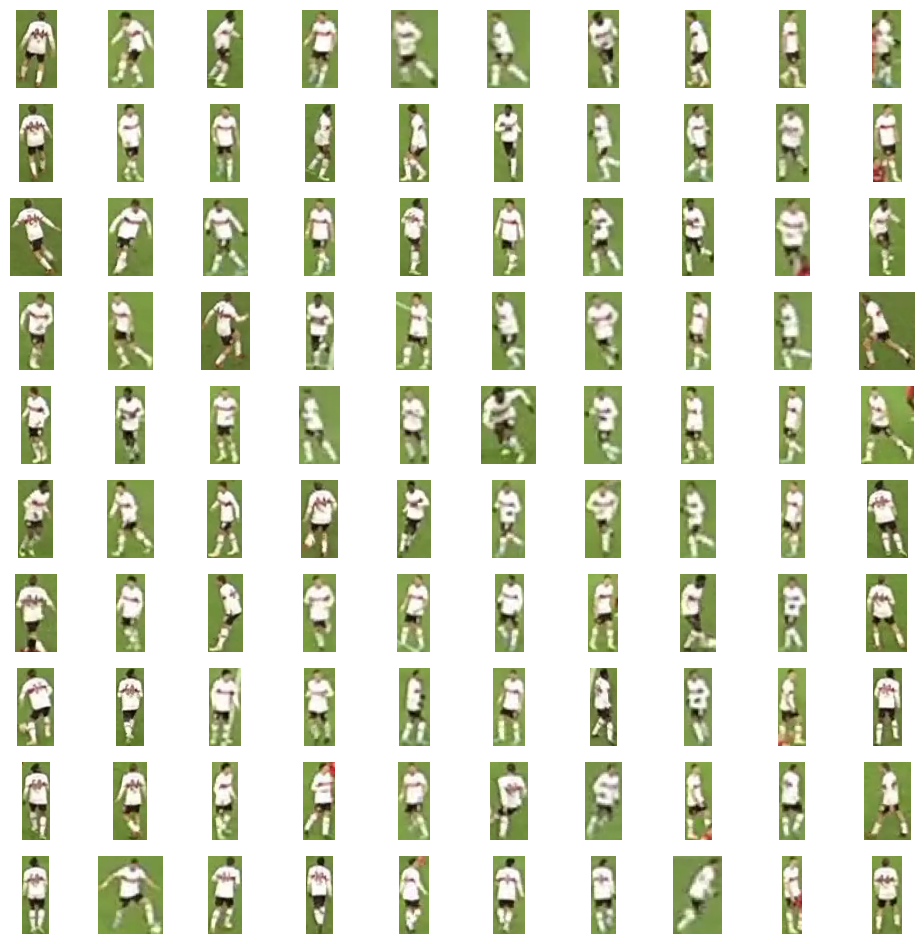

In [29]:
sv.plot_images_grid(team_0[:100],grid_size=(10,10))

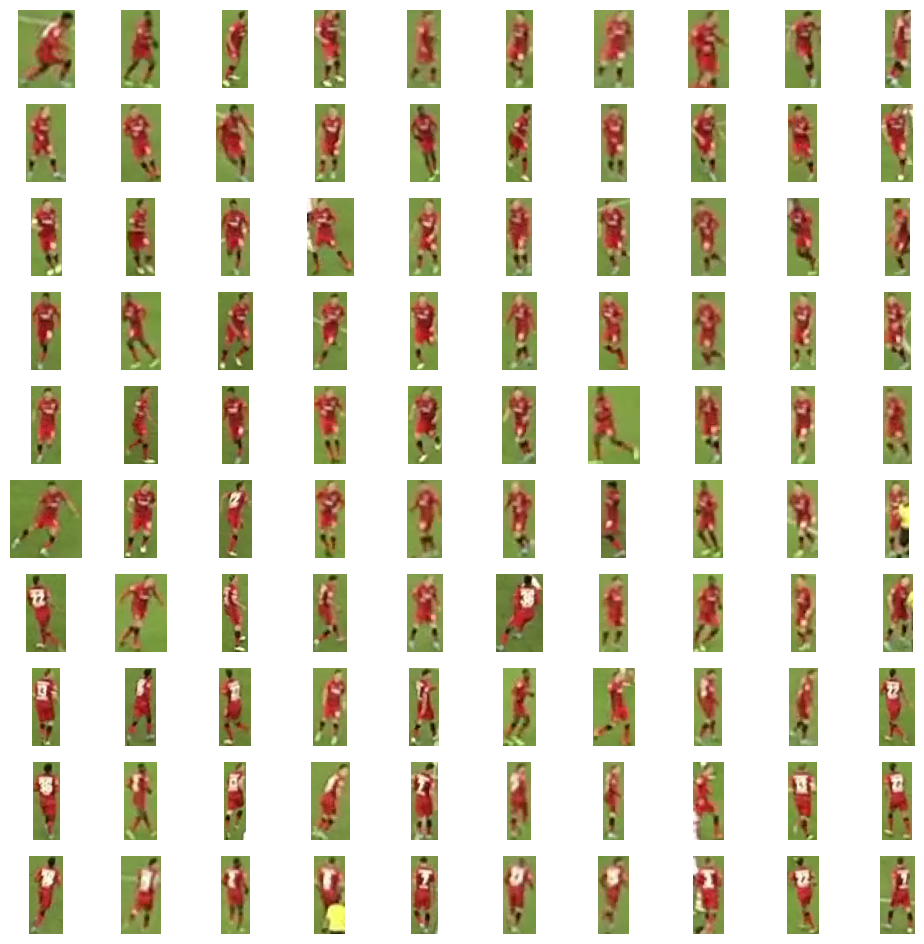

In [30]:
sv.plot_images_grid(team_1[:100],grid_size=(10,10))

awesome